In [ ]:
def compressor(data):
  data = np.array(data)
  data = data[:,1:].astype(float)
  first=data[:,[0]]
  mean=np.mean(first)
  datapoint=np.empty((5, 53))
  for i in range(0,53):
    first=data[:,[i]]
    datapoint[0][i]=(np.mean(first))
    first=data[:,[i]]
    datapoint[1][i]=(np.min(first))
    first=data[:,[i]]
    datapoint[2][i]=(np.max(first))
    first=data[:,[i]]
    datapoint[3][i]=(np.std(first))
    first=data[:,[i]]
    datapoint[4][i]=(np.sum(first**2))
  result = datapoint.flatten()
  return result

In [ ]:
import pandas as pd
import numpy as np
import csv

In [ ]:
size=60

path1 = "dsc_fc_summed_spectra_2016_v01.csv"
path2 = "dsc_fc_summed_spectra_2017_v01.csv"
path3 = "dsc_fc_summed_spectra_2018_v01.csv"
path4 = "dsc_fc_summed_spectra_2019_v01.csv"
path5 = "dsc_fc_summed_spectra_2020_v01.csv"
path6 = "dsc_fc_summed_spectra_2021_v01.csv"
path7 = "dsc_fc_summed_spectra_2022_v01.csv"
path8 = "dsc_fc_summed_spectra_2023_v01.csv"

cr_1 = pd.read_csv(path1,chunksize=size)
cr_2 = pd.read_csv(path1,chunksize=size)
cr_3 = pd.read_csv(path1,chunksize=size)
cr_4 = pd.read_csv(path1,chunksize=size)
cr_5 = pd.read_csv(path2,chunksize=size)
cr_6 = pd.read_csv(path3,chunksize=size)
cr_8 = pd.read_csv(path5,chunksize=size)

chunk_reader = pd.concat([cr_1, cr_2, cr_3, cr_4, cr_5, cr_6, cr_7, cr_8], axis=0)
documentdata = list()

for chunk in chunk_reader:
  documentdata.append(compressor(chunk))


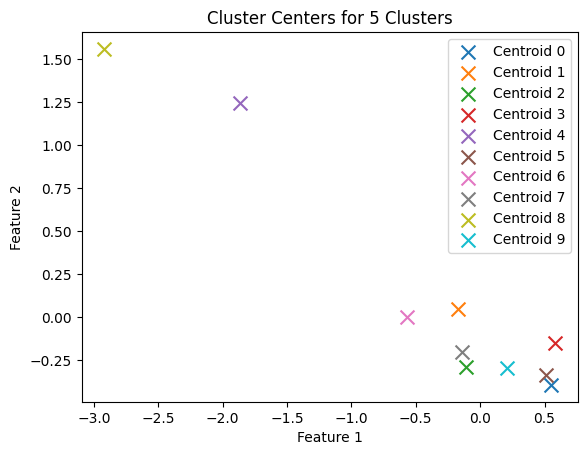

In [ ]:
from sklearn.cluster import KMeans
from scipy.sparse import lil_matrix
from sklearn.mixture import GaussianMixture

documentdata = np.nan_to_num(documentdata, nan=0.0)

sparse_data=lil_matrix(documentdata)

k=10

# Create a GMM clustering model with EM
gmm = GaussianMixture(n_components=k, covariance_type='diag', n_init=10, random_state=0)

# Fit the model to the data
gmm.fit(sparse_data.toarray())

# Get cluster assignments for each data point
cluster_assignments = gmm.predict(sparse_data.toarray())

# Display cluster assignments
      #for i in range(len(cluster_assignments)):
      #    print(f"Data point {i + 1} is in Cluster {cluster_assignments[i] + 1}")
# Get cluster centroids (cluster centers)
cluster_centers = gmm.means_

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
cluster_labels = np.array([0, 1, 2, 3, 4])

# Create a scatter plot of the cluster centers (5 centroids)
for i in range(len(cluster_centers)):
    plt.scatter(cluster_centers[i, 0], cluster_centers[i, 1], c=colors[i], marker='x', s=100, label=f'Centroid {i}')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')

# Show the plot
plt.title('Cluster Centers for 5 Clusters')
plt.show()


<ipython-input-140-db5e7bb6c328>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors[i], cmap='viridis', marker='o', s=50)


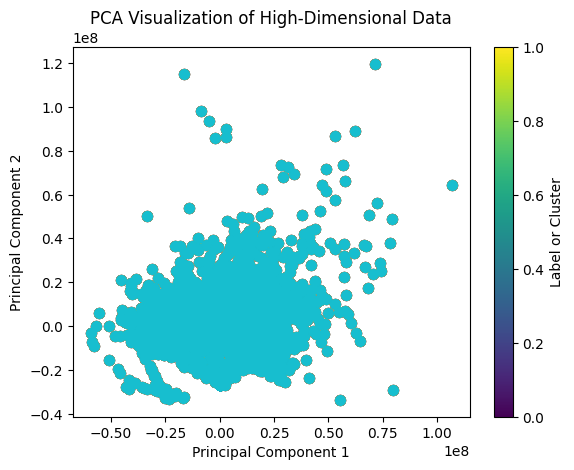

In [ ]:
# 2D PCA Model
from sklearn.decomposition import PCA
# Create a PCA model and specify the number of components
pca = PCA(n_components=3)
# Fit PCA to the normalized data
reduced_data = pca.fit_transform(documentdata)
for i in range(len(cluster_centers)):
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors[i], cmap='viridis', marker='o', s=50)
# Add labels and a colorbar if needed
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label or Cluster')
plt.title('PCA Visualization of High-Dimensional Data')
# Show the plot
plt.show()


<ipython-input-141-6d810fd48596>:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors[i], cmap='viridis', marker='o', s=50)


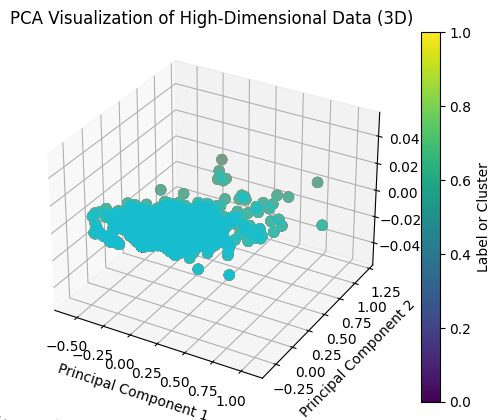

In [ ]:
# 3D PCA Model
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
# Create a PCA model and specify 3 components for 3D visualization
pca = PCA(n_components=3)

# Fit PCA to the normalized data
reduced_data = pca.fit_transform(documentdata)
# Create a 3D scatter plot of the reduced data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
for i in range(len(cluster_centers)):
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors[i], cmap='viridis', marker='o', s=50)
# Add labels and a colorbar if needed
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(label='Label or Cluster')
plt.title('PCA Visualization of High-Dimensional Data (3D)')

# Show the 3D plot
plt.show()

<ipython-input-142-a23aeac04890>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(np.unique(cluster_assignments)))


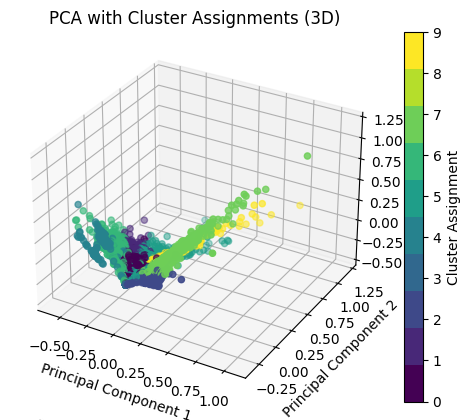

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a colormap for the clusters
colormap = plt.cm.get_cmap('viridis', len(np.unique(cluster_assignments)))

# Create a 3D scatter plot
scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], reduced_data[:, 2], c=cluster_assignments, cmap=colormap)

# Add labels and a colorbar
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter, label='Cluster Assignment')

# Show the 3D plot
plt.title('PCA with Cluster Assignments (3D)')
plt.show()


In [ ]:
#Testing
testpath="dsc_fc_summed_spectra_2023_v01.csv"
size=60
chunk_reader=pd.read_csv(testpath,chunksize=size)
testdata=[]
for chunk in chunk_reader:
  testdata.append(compressor(chunk))
testdata = np.array(testdata)
testdata = np.nan_to_num(testdata, nan=0.0)
reduced_test_data = pca.transform(testdata)

<ipython-input-144-89a717596e09>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_test_data[:, 0], reduced_test_data[:, 1], c=colors[i], cmap='viridis', marker='o', s=50)


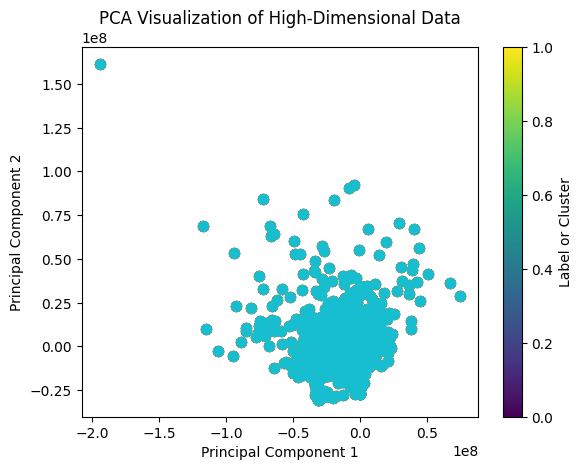

<ipython-input-144-89a717596e09>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(reduced_test_data[:, 0], reduced_test_data[:, 1], c=colors[i], cmap='viridis', marker='o', s=50)


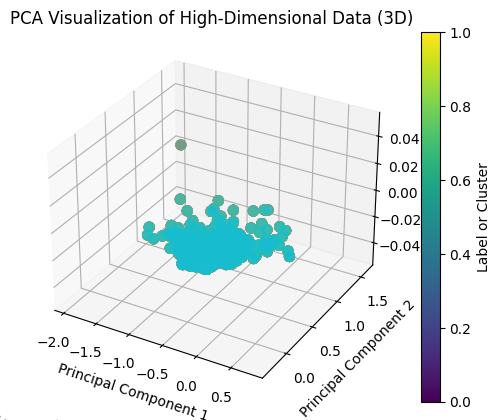

<ipython-input-144-89a717596e09>:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('viridis', len(np.unique(cluster_assignments)))


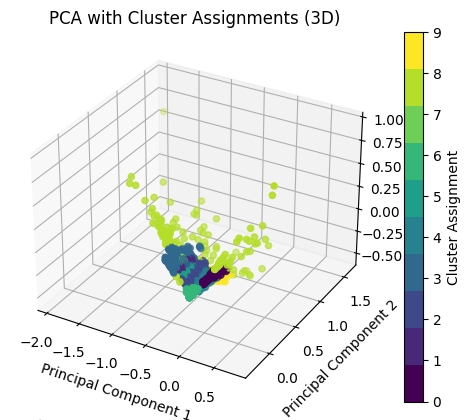

In [ ]:
# Create a scatter plot of the reduced data
#plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=50)
for i in range(len(cluster_centers)):
  plt.scatter(reduced_test_data[:, 0], reduced_test_data[:, 1], c=colors[i], cmap='viridis', marker='o', s=50)
# Add labels and a colorbar if needed
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label or Cluster')
plt.title('PCA Visualization of High-Dimensional Data')

# Show the plot
plt.show()
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
# Create a PCA model and specify 3 components for 3D visualization
pca = PCA(n_components=3)

# Fit PCA to the normalized data
reduced_data = pca.fit_transform(documentdata)
# Create a 3D scatter plot of the reduced data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D
for i in range(len(cluster_centers)):
  plt.scatter(reduced_test_data[:, 0], reduced_test_data[:, 1], c=colors[i], cmap='viridis', marker='o', s=50)
# Add labels and a colorbar if needed
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(label='Label or Cluster')
plt.title('PCA Visualization of High-Dimensional Data (3D)')

# Show the 3D plot
plt.show()
# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a colormap for the clusters
colormap = plt.cm.get_cmap('viridis', len(np.unique(cluster_assignments)))

#KMEANS

sparse_data=lil_matrix(reduced_test_data)

k=10

# Create a K-means clustering model
#kmeans = KMeans(n_clusters=k)
# Fit the model to the data
#kmeans.fit(sparse_data)
# Create a GMM clustering model with EM
gmm = GaussianMixture(n_components=k, covariance_type='diag', n_init=10, random_state=0)#, missing_values='raise')

# Fit the model to the data
gmm.fit(sparse_data.toarray())

# Get cluster assignments for each data point
#cluster_assignments = kmeans.predict(sparse_data)

# Get cluster assignments for each data point
test_cluster_assignments = gmm.predict(sparse_data.toarray())




# Create a 3D scatter plot
scatter = ax.scatter(reduced_test_data[:, 0], reduced_test_data[:, 1], reduced_test_data[:, 2], c=test_cluster_assignments, cmap=colormap)

# Add labels and a colorbar
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter, label='Cluster Assignment')

# Show the 3D plot
plt.title('PCA with Cluster Assignments (3D)')
plt.show()



In [ ]:
from sklearn.metrics import adjusted_rand_score

# Assuming `train_cluster_assignments` and `test_cluster_assignments` are your cluster assignments
#ari_score = adjusted_rand_score(cluster_assignments, test_cluster_assignments)
print(ari_score)

1.0
